Payload retrieved from database


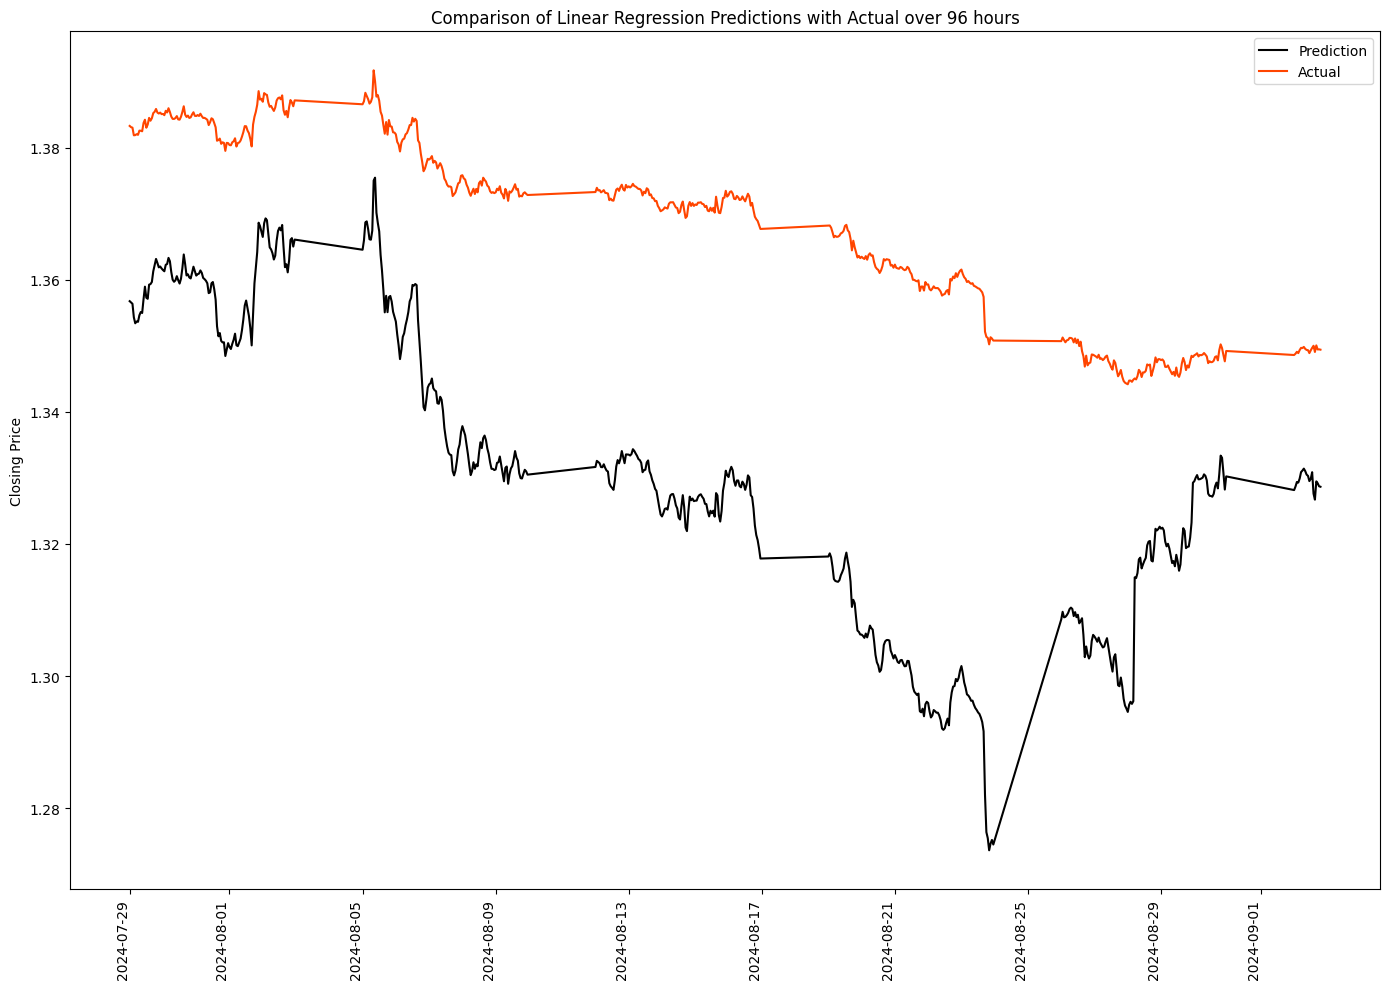

In [8]:
import psycopg2
import pickle
import os
from dotenv import load_dotenv
import dash
from dash import dcc, html
import dash_bootstrap_components as dbc
from dash.dependencies import Input, Output
from scipy.stats import gaussian_kde
import pandas as pd
import plotly.express as px
import plotly.graph_objs as go
from sklearn.metrics import root_mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# Load the environment variables
load_dotenv()

# Database connection variables
database = 'fx_tradingDB'
user = os.getenv('POSTGRE_USERNAME')
password = os.getenv('POSTGRE_PASSWORD')
port = os.getenv('POSTGRE_PORT')

# Connect to db
conn = psycopg2.connect(database=database,
                        user=user,
                        password=password,
                        port=port)
payload = '''SELECT p.date_time, 
                    p.predictions,
                    f.close
                    FROM public.predictions as p
                    JOIN public.financial_data as f
					ON p.date_time = f.date_time
                    ORDER BY p.date_time;
                    '''


try:
    cur = conn.cursor()
    cur.execute(payload)
    data = cur.fetchall()
    data_columns = [desc[0] for desc in cur.description]
    print('Payload retrieved from database')
except:
    print('Error executing db query')

df = pd.DataFrame(data, columns=data_columns)
df.index = df['date_time']
plt.figure(figsize=(14, 10))
plt.plot(df['predictions'].loc['2024-7-27':], label='Prediction', color='black')
plt.plot(df['close'].loc['2024-7-27':], label='Actual', color='orangered')
plt.xticks(rotation=90, ha='right')
plt.title('Comparison of Linear Regression Predictions with Actual: Production Data')
plt.ylabel('Closing Price')
plt.legend()
plt.tight_layout()